# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

# Importing Dataset

The dataset we are going to use in this article is the famous Iris data set. Some additional information about the Iris dataset is available at:

https://archive.ics.uci.edu/ml/datasets/iris

The dataset consists of 150 records of Iris plant with four features: 'sepal-length', 'sepal-width', 'petal-length', and 'petal-width'. All of the features are numeric. The records have been classified into one of the three classes i.e. 'Iris-setosa', 'Iris-versicolor', or 'Iris-verginica'.

Execute the following script to download the dataset using pandas:

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

# Let's take a look at what our dataset looks like:

In [3]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing
The first preprocessing step is to divide the dataset into a feature set and corresponding labels. The following script performs this task:

In [4]:
Features = dataset.drop('Class', 1)
Labels = dataset['Class']

# Normalization of Features
As mentioned earlier, PCA performs best with a normalized feature set. 
We will perform standard scalar normalization to normalize our feature set. To do this, execute the following code:

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Features_norm = sc.fit_transform(Features)

# Applying tSNE

In [9]:
seed = 42
tsne = TSNE(n_components=2, n_iter=1000, random_state=seed)
Features_tSNE = tsne.fit_transform(Features_norm)

principalDf = pd.DataFrame(data = Features_tSNE, columns = ['1st eigenvector', '2nd eigenvector'])
finalDf = pd.concat([principalDf, dataset[['Class']]], axis = 1)

# Visualize plot
This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

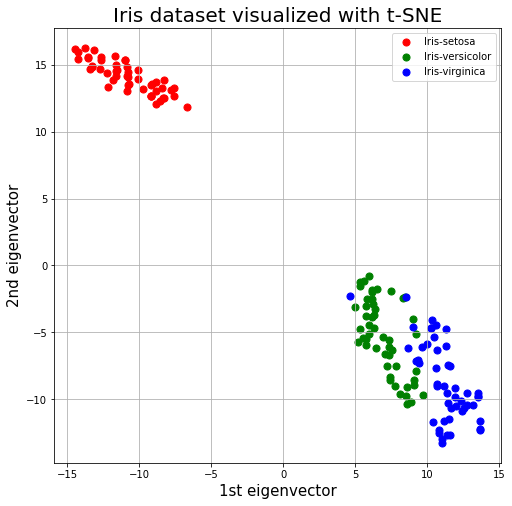

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('1st eigenvector', fontsize = 15)
ax.set_ylabel('2nd eigenvector', fontsize = 15)
ax.set_title('Iris dataset visualized with t-SNE', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, '1st eigenvector']
               , finalDf.loc[indicesToKeep, '2nd eigenvector']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()